Iter 1: mejor=0.053
Iter 2: mejor=0.053
Iter 3: mejor=0.053
Iter 4: mejor=0.053
Iter 5: mejor=0.053
Iter 6: mejor=0.053
Iter 7: mejor=0.053
Iter 8: mejor=0.053
Iter 9: mejor=0.053
Iter 10: mejor=0.053
Iter 11: mejor=0.054
Iter 12: mejor=0.055
Iter 13: mejor=0.055
Iter 14: mejor=0.055
Iter 15: mejor=0.056
Iter 16: mejor=0.056
Iter 17: mejor=0.056
Iter 18: mejor=0.056
Iter 19: mejor=0.056
Iter 20: mejor=0.056
Iter 21: mejor=0.057
Iter 22: mejor=0.059
Iter 23: mejor=0.059
Iter 24: mejor=0.059
Iter 25: mejor=0.061
Iter 26: mejor=0.061
Iter 27: mejor=0.061
Iter 28: mejor=0.062
Iter 29: mejor=0.062
Iter 30: mejor=0.062
Mejor cobertura encontrada: 0.06185669407806306


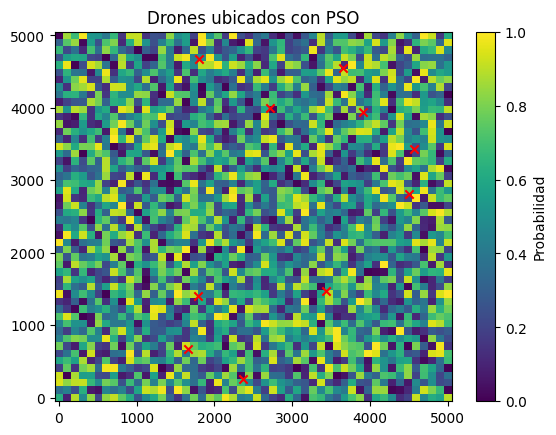

In [3]:
import numpy as np
import matplotlib.pyplot as plt
AREA = 5000
NUM_DRONES = 10
RANGO = 200
POP = 20
ITERS = 30
N = 50
x = np.linspace(0, AREA, N)
y = np.linspace(0, AREA, N)
X, Y = np.meshgrid(x,y)
P = np.random.rand(N,N)
P /= P.sum()
def evaluar(pos):
    # pos tiene NUM_DRONES*2 valores (x,y de cada dron)
    drones = pos.reshape(NUM_DRONES,2)
    cobertura = np.zeros_like(P)
    for d in drones:
        dist = np.sqrt((X-d[0])**2+(Y-d[1])**2)
        cobertura[dist<=RANGO] = 1
    return (P*cobertura).sum()
DIM = NUM_DRONES*2
lb, ub = 0, AREA
pos = np.random.uniform(lb,ub,(POP,DIM))
vel = np.zeros((POP,DIM))
pbest = pos.copy()
pbest_val = np.array([evaluar(p) for p in pos])
gbest = pbest[np.argmax(pbest_val)].copy()
gbest_val = pbest_val.max()

for it in range(ITERS):
    for i in range(POP):
        r1, r2 = np.random.rand(DIM), np.random.rand(DIM)
        vel[i] = 0.5*vel[i] + 1.5*r1*(pbest[i]-pos[i]) + 1.5*r2*(gbest-pos[i])
        pos[i] = np.clip(pos[i]+vel[i], lb, ub)
        val = evaluar(pos[i])
        if val > pbest_val[i]:
            pbest_val[i] = val
            pbest[i] = pos[i].copy()
            if val > gbest_val:
                gbest_val = val
                gbest = pos[i].copy()
    print(f"Iter {it+1}: mejor={gbest_val:.3f}")

# -------- Resultados -------------------
print("Mejor cobertura encontrada:", gbest_val)
mejores = gbest.reshape(NUM_DRONES,2)

plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,P,shading="auto")
plt.scatter(mejores[:,0],mejores[:,1],c="red",marker="x")
plt.title("Drones ubicados con PSO")
plt.colorbar(label="Probabilidad")
plt.show()
